**CN7030 ML on Big Data: Coursework**

Spark install and environment setup (Java, spark environment variable path setup)

In [ ]:
!apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-3.0.2/spark-3.0.2-bin-hadoop2.7.tgz
# unxip the downloaded folder 
!tar xf spark-3.0.2-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop2.7"
# starts the spark only three steps
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

loading the Dataset to the dataframe and providing the header names. UNSW-NB15.csv file loaded to the google drive and mounted. and printing the Schema of the dataset.


In [ ]:
data=spark.read.csv('/content/drive/MyDrive/CRWK_UEL/UNSW-NB15.csv',inferSchema=True, header=True)

dfTE = data.toDF("srcip","sport","dstip","dsport","proto","state","dur","sbytes","dbytes","sttl","dttl","sloss","dloss","service","Sload","Dload","Spkts","Dpkts","swin","dwin","stcpb","dtcpb","smeansz","dmeansz","trans_depth","res_bdy_len","Sjit","Djit","Stime","Ltime","Sintpkt","Dintpkt","tcprtt","synack","ackdat","is_sm_ips_ports","ct_state_ttl","ct_flw_http_mthd","is_ftp_login","ct_ftp_cmd","ct_srv_src","ct_srv_dst","ct_dst_ltm","ct_src_ ltm","ct_src_dport_ltm","ct_dst_sport_ltm","ct_dst_src_ltm","attack_cat","Label")

dfTE.printSchema()

Displaysome sample records

In [ ]:
import pandas as pd
pd.DataFrame(dfTE.take(4), columns=dfTE.columns).transpose()

,0,1,2,3
srcip,59.166.0.0,59.166.0.5,59.166.0.9,59.166.0.8
sport,43467,41289,43785,40691
dstip,149.171.126.6,149.171.126.2,149.171.126.0,149.171.126.9
dsport,49729,9574,6881,6881
proto,tcp,tcp,tcp,tcp
state,FIN,FIN,FIN,FIN
dur,0.101815,0.044003,2.79083,2.6335
sbytes,4238,2750,10476,13350
dbytes,65628,29104,395734,548216
sttl,31,31,31,31


Removing the Duplicate records, found **480624** duplicate records

In [ ]:
print("Total number of records =",dfTE.count())

df3 = dfTE.dropDuplicates()

print("After removing the duplicate records =",df3.count())

duplicates= (dfTE.count()) - (df3.count())

print(" Number of Duplicate records =", duplicates)

Total number of records = 2539738
After removing the duplicate records = 2059114
 Number of Duplicate records = 480624


Checking if any Null values for the given dataset. found **'attack_cat': 1959471** null values or not mention any thing.

In [ ]:
Dict_Null = {col:df3.filter(df3[col].isNull()).count() for col in df3.columns}
Dict_Null

{'Dintpkt': 0,
 'Djit': 0,
 'Dload': 0,
 'Dpkts': 0,
 'Label': 0,
 'Ltime': 0,
 'Sintpkt': 0,
 'Sjit': 0,
 'Sload': 0,
 'Spkts': 0,
 'Stime': 0,
 'ackdat': 0,
 'attack_cat': 1959471,
 'ct_dst_ltm': 0,
 'ct_dst_sport_ltm': 0,
 'ct_dst_src_ltm': 0,
 'ct_flw_http_mthd': 0,
 'ct_ftp_cmd': 0,
 'ct_src_ ltm': 0,
 'ct_src_dport_ltm': 0,
 'ct_srv_dst': 0,
 'ct_srv_src': 0,
 'ct_state_ttl': 0,
 'dbytes': 0,
 'dloss': 0,
 'dmeansz': 0,
 'dsport': 0,
 'dstip': 0,
 'dtcpb': 0,
 'dttl': 0,
 'dur': 0,
 'dwin': 0,
 'is_ftp_login': 0,
 'is_sm_ips_ports': 0,
 'proto': 0,
 'res_bdy_len': 0,
 'sbytes': 0,
 'service': 0,
 'sloss': 0,
 'smeansz': 0,
 'sport': 0,
 'srcip': 0,
 'state': 0,
 'stcpb': 0,
 'sttl': 0,
 'swin': 0,
 'synack': 0,
 'tcprtt': 0,
 'trans_depth': 0}

Grouping and aggregating on our desired columns **lable** and **attack_cat** in lable values **0 for normal and 1 for attack records**

In [ ]:
from pyspark.sql.functions import col, trim,countDistinct
from pyspark.sql.functions import *

df3.agg(countDistinct(col("Label")).alias("count")).show()

df3.agg(countDistinct(col("attack_cat")).alias("count")).show()

df3.groupBy("Label").count().show()
df3.groupBy("attack_cat").count().show()

+-----+
|count|
+-----+
|    2|
+-----+

+-----+
|count|
+-----+
|   10|
+-----+

+-----+-------+
|Label|  count|
+-----+-------+
|    1|  99643|
|    0|1959471|
+-----+-------+

+--------------+-------+
|    attack_cat|  count|
+--------------+-------+
|         Worms|    171|
|     Shellcode|   1511|
|       Fuzzers|  21795|
|      Analysis|   2184|
|           DoS|   5665|
|Reconnaissance|  13357|
|      Backdoor|   1983|
|      Exploits|  27599|
|  Not_Effected|1959471|
|       Generic|  25378|
+--------------+-------+



In attack_cat column so many null values and duplicate found. ex:Backdoors and Backdoor are same. so taking them as unique and removing the spaces as well.


In [ ]:
df3 = df3.withColumn("attack_cat", trim(col("attack_cat")))
df3 = df3.withColumn('attack_cat', regexp_replace('attack_cat', 'Backdoors', 'Backdoor'))


In [ ]:
df3.agg(countDistinct(col("attack_cat")).alias("count")).show()

df3.groupBy("attack_cat").count().show()

+-----+
|count|
+-----+
|    9|
+-----+

+--------------+-------+
|    attack_cat|  count|
+--------------+-------+
|         Worms|    171|
|     Shellcode|   1511|
|          null|1959471|
|       Fuzzers|  21795|
|      Analysis|   2184|
|           DoS|   5665|
|Reconnaissance|  13357|
|      Backdoor|   1983|
|      Exploits|  27599|
|       Generic|  25378|
+--------------+-------+



In [ ]:
from pyspark.sql.functions import expr , when , lit , col
df3=df3.withColumn('attack_cat', when(col('attack_cat') == '',None).otherwise(col('attack_cat')))

Changing the **Null** 1959471 values to **Not effected** by considering below sql quires

In [ ]:
df3= df3.withColumn('attack_cat', when (df3.attack_cat.isNull(),lit('Not_Effected')).otherwise(df3.attack_cat))

pd.DataFrame(df3.take(8), columns=df3.columns).transpose()

,0,1,2,3,4,5,6,7
srcip,10.40.182.3,10.40.182.3,10.40.170.2,149.171.126.12,175.45.176.3,175.45.176.0,175.45.176.0,175.45.176.0
sport,0,0,0,1043,63491,18506,65433,32910
dstip,10.40.182.3,10.40.182.3,10.40.170.2,175.45.176.0,149.171.126.19,149.171.126.12,149.171.126.15,149.171.126.17
dsport,0,0,0,53,36782,111,111,1813
proto,arp,arp,arp,udp,udp,udp,udp,udp
state,INT,INT,INT,INT,INT,INT,INT,INT
dur,0,0,0,2e-06,1e-06,3e-06,3e-06,3e-06
sbytes,46,46,46,264,110,168,168,172
dbytes,0,0,0,0,0,0,0,0
sttl,0,0,0,60,254,254,254,254


In [ ]:
df3.groupBy("attack_cat").count().show()

+--------------+-------+
|    attack_cat|  count|
+--------------+-------+
|         Worms|    171|
|     Shellcode|   1511|
|       Fuzzers|  21795|
|      Analysis|   2184|
|           DoS|   5665|
|Reconnaissance|  13357|
|      Backdoor|   1983|
|      Exploits|  27599|
|  Not_Effected|1959471|
|       Generic|  25378|
+--------------+-------+



In [ ]:
df3.filter( (df3.attack_cat  == "Not_Effected") & (df3.Label  == "1") ).show(10)  

+-----+-----+-----+------+-----+-----+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+----+----+-----+-----+-------+-------+------+------+------+---------------+------------+----------------+------------+----------+----------+----------+----------+-----------+----------------+----------------+--------------+----------+-----+
|srcip|sport|dstip|dsport|proto|state|dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|Sload|Dload|Spkts|Dpkts|swin|dwin|stcpb|dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|Sjit|Djit|Stime|Ltime|Sintpkt|Dintpkt|tcprtt|synack|ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|
+-----+-----+-----+------+-----+-----+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+--

In [ ]:
#Filter multiple condition
df4 = df3.filter( (df3.attack_cat  == "Not_Effected") & (df3.Label  == "0") )

df4.count()

1959471

In [ ]:
df3.groupBy("Label").count().show()

+-----+-------+
|Label|  count|
+-----+-------+
|    1|  99643|
|    0|1959471|
+-----+-------+



By considering above analysis, we can get to know all null values in the attack_cat column are not effected by any attack. 

In [ ]:
numeric_features = [t[0] for t in dfTE.dtypes if t[1] == 'int']
dfTE.select(numeric_features).describe().toPandas().transpose()



,0,1,2,3,4
summary,count,mean,stddev,min,max
sport,2539738,30536.92077804876,20441.2142160254,0,65535
dsport,2539738,11235.101156103503,18438.20315203261,0,65535
sbytes,2539738,4340.070896289302,56409.409186153316,0,14355774
dbytes,2539738,36432.01927679154,161105.33522674238,0,14657531
sttl,2539738,62.78151053376372,74.6267115956767,0,255
dttl,2539738,30.770441675479912,42.851930611408726,0,254
sloss,2539738,5.164537444413558,22.5183674285243,0,5319
dloss,2539738,16.331417650167065,56.597900641709714,0,5507
Spkts,2539738,33.29253293056213,76.28775056857421,0,10646


Adding a new column to the dataframe having attack_cat column values to numaric conversition

In [ ]:
from pyspark.ml.feature import StringIndexer
l_indexer = StringIndexer(inputCol="attack_cat", outputCol="Numaric_attack_cat")
df5 = l_indexer.fit(df3).transform(df3)

In [ ]:
df5.agg(countDistinct(col("attack_cat")).alias("count")).show()

df5.agg(countDistinct(col("Numaric_attack_cat")).alias("count")).show()

df5.groupBy("attack_cat").count().show()

df5.groupBy("Numaric_attack_cat").count().show()


+-----+
|count|
+-----+
|   10|
+-----+

+-----+
|count|
+-----+
|   10|
+-----+

+--------------+-------+
|    attack_cat|  count|
+--------------+-------+
|         Worms|    171|
|     Shellcode|   1511|
|       Fuzzers|  21795|
|      Analysis|   2184|
|           DoS|   5665|
|Reconnaissance|  13357|
|      Backdoor|   1983|
|      Exploits|  27599|
|  Not_Effected|1959471|
|       Generic|  25378|
+--------------+-------+

+------------------+-------+
|Numaric_attack_cat|  count|
+------------------+-------+
|               8.0|   1511|
|               0.0|1959471|
|               7.0|   1983|
|               1.0|  27599|
|               4.0|  13357|
|               3.0|  21795|
|               2.0|  25378|
|               6.0|   2184|
|               5.0|   5665|
|               9.0|    171|
+------------------+-------+



In [ ]:
df5.printSchema()

root
 |-- srcip: string (nullable = true)
 |-- sport: integer (nullable = true)
 |-- dstip: string (nullable = true)
 |-- dsport: integer (nullable = true)
 |-- proto: string (nullable = true)
 |-- state: string (nullable = true)
 |-- dur: double (nullable = true)
 |-- sbytes: integer (nullable = true)
 |-- dbytes: integer (nullable = true)
 |-- sttl: integer (nullable = true)
 |-- dttl: integer (nullable = true)
 |-- sloss: integer (nullable = true)
 |-- dloss: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- Sload: double (nullable = true)
 |-- Dload: double (nullable = true)
 |-- Spkts: integer (nullable = true)
 |-- Dpkts: integer (nullable = true)
 |-- swin: integer (nullable = true)
 |-- dwin: integer (nullable = true)
 |-- stcpb: long (nullable = true)
 |-- dtcpb: long (nullable = true)
 |-- smeansz: integer (nullable = true)
 |-- dmeansz: integer (nullable = true)
 |-- trans_depth: integer (nullable = true)
 |-- res_bdy_len: integer (nullable = true)
 |-- S

In [ ]:
import six

for i in df5.select(numeric_features).columns:
    if not( isinstance(df5.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Label for ", i, df5.stat.corr('Label',i))

Correlation to Label for  sport -0.05401342535587188
Correlation to Label for  dsport -0.13686404150853598
Correlation to Label for  sbytes 0.045681546946771
Correlation to Label for  dbytes -0.03740372377978368
Correlation to Label for  sttl 0.7659793823575981
Correlation to Label for  dttl 0.5221387237308709
Correlation to Label for  sloss 0.017917108446613123
Correlation to Label for  dloss -0.04774416849621018
Correlation to Label for  Spkts -0.04532627071777845
Correlation to Label for  Dpkts -0.05744272549341605
Correlation to Label for  swin -0.07886551484776477
Correlation to Label for  dwin -0.07803692228229513
Correlation to Label for  smeansz 0.05692127326749956
Correlation to Label for  dmeansz -0.1465341649462821
Correlation to Label for  trans_depth 0.046452080784387305
Correlation to Label for  res_bdy_len -0.010822369502278554
Correlation to Label for  Stime 0.15893077863542496
Correlation to Label for  Ltime 0.1589309011062609
Correlation to Label for  is_sm_ips_ports 

So far we did Data preprocessing / Data cleaning which is common for both Binary Classification and Multi class classification models and feature selection based on above correlation we have selected 24 top correlation (both +ve and -ve) as input to feature column to the **Binary Classification** model.  

In [ ]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['synack', 'tcprtt', 'Ltime', 'Stime','dmeansz', 'dwin', 'swin', 'Dpkts','ct_dst_src_ltm','Spkts','Dload','Sload','dttl','sttl','dsport','sport','ct_src_dport_ltm', 'ct_src_ ltm', 'ct_dst_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_state_ttl', 'ackdat','Numaric_attack_cat'], outputCol = 'features')

vdf = vectorAssembler.transform(df5)
vdf = vdf.select(['features', 'Label'])
vdf.show(5)  

+--------------------+-----+
|            features|Label|
+--------------------+-----+
|(24,[2,3,8,9,16,1...|    0|
|(24,[2,3,8,9,16,1...|    0|
|(24,[2,3,8,9,16,1...|    0|
|(24,[2,3,8,9,11,1...|    0|
|[0.0,0.0,1.424227...|    1|
+--------------------+-----+
only showing top 5 rows



In [ ]:
splits = vdf.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

print("Training Dataset Count: " + str(train_df.count()))
print("Test Dataset Count: " + str(test_df.count()))

Training Dataset Count: 1441023
Test Dataset Count: 618091


# **Binary Classification**

##**LogisticRegression**

In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'Label', maxIter=10)
lrModel = lr.fit(train_df)


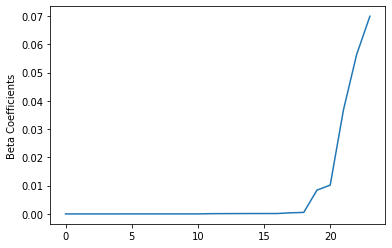

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

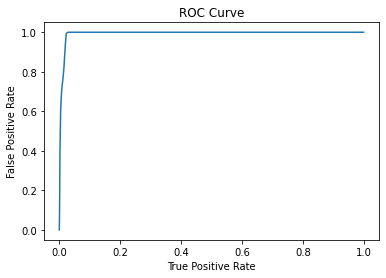

Training set areaUnderROC: 0.9934430243139536


In [ ]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

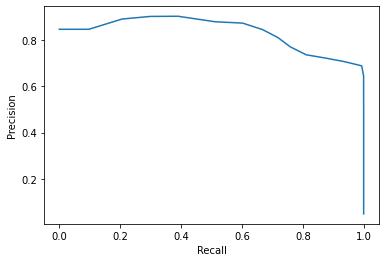

In [ ]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
predictions = lrModel.transform(test_df)
predictions.select("prediction","Label","features").show(10)


+----------+-----+--------------------+
|prediction|Label|            features|
+----------+-----+--------------------+
|       0.0|    0|(24,[2,3,4,7,8,9,...|
|       0.0|    0|(24,[2,3,4,7,8,9,...|
|       0.0|    0|(24,[2,3,4,7,8,9,...|
|       0.0|    0|(24,[2,3,4,7,8,9,...|
|       0.0|    0|(24,[2,3,4,7,8,9,...|
|       0.0|    0|(24,[2,3,8,9,11,1...|
|       0.0|    0|(24,[2,3,8,9,11,1...|
|       0.0|    0|(24,[2,3,8,9,11,1...|
|       0.0|    0|(24,[2,3,8,9,11,1...|
|       0.0|    0|(24,[2,3,8,9,11,1...|
+----------+-----+--------------------+
only showing top 10 rows



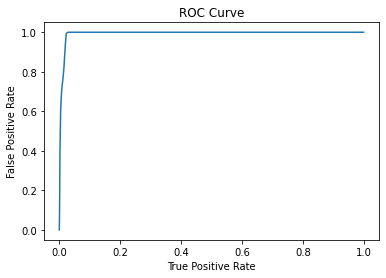

Testing set areaUnderROC: 0.9934430243139536


In [ ]:
testingSummary = lrModel.summary
roc = testingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Testing set areaUnderROC: ' + str(testingSummary.areaUnderROC))

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator().setMetricName('areaUnderROC').setLabelCol('Label').setRawPredictionCol('rawPrediction')
print('Test Area Under ROC', evaluator.evaluate(predictions))



Test Area Under ROC 0.9935169746309366


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


evaluator = MulticlassClassificationEvaluator().setMetricName('accuracy').setLabelCol('Label')
accuracy = evaluator.evaluate(predictions)

print("Accuracy of the logisticRegression Classification Model =", accuracy) 
print("Test Error of logisticRegression Classification Model  = %g" % (1.0 - accuracy))

Accuracy of the logisticRegression Classification Model = 0.9520038311510765
Test Error of logisticRegression Classification Model  = 0.0479962


# **Decision Tree Classifier** 

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="Label", outputCol='TargetLabel').fit(vdf)
# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =VectorIndexer(inputCol="features", outputCol='selective_features', maxCategories=4).fit(vdf)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = vdf.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol='Label', featuresCol='features')

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", 'Label', "features").show(4)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol='Label', predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("accuracy =", accuracy)
print("Test Error = %g " % (1.0 - accuracy))

treeModel = model.stages[2]
# summary only
print(treeModel)


+----------+-----+--------------------+
|prediction|Label|            features|
+----------+-----+--------------------+
|       0.0|    0|(24,[2,3,4,7,8,9,...|
|       0.0|    0|(24,[2,3,4,7,8,9,...|
|       0.0|    0|(24,[2,3,4,7,8,9,...|
|       0.0|    0|(24,[2,3,4,7,8,9,...|
+----------+-----+--------------------+
only showing top 4 rows

accuracy = 1.0
Test Error = 0 
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_bb45775a9f23, depth=1, numNodes=3, numClasses=2, numFeatures=24


In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Label', maxDepth = 3)
dtModel = dt.fit(train_df)
predictions = dtModel.transform(test_df)
predictions.select("prediction","Label","features").show(10)


+----------+-----+--------------------+
|prediction|Label|            features|
+----------+-----+--------------------+
|       0.0|    0|(23,[2,3,4,7,8,9,...|
|       0.0|    0|(23,[2,3,4,7,8,9,...|
|       0.0|    0|(23,[2,3,4,7,8,9,...|
|       0.0|    0|(23,[2,3,4,7,8,9,...|
|       0.0|    0|(23,[2,3,4,7,8,9,...|
|       0.0|    0|(23,[2,3,4,7,8,9,...|
|       0.0|    0|(23,[2,3,4,7,8,9,...|
|       0.0|    0|(23,[2,3,4,7,8,9,...|
|       0.0|    0|(23,[2,3,4,7,8,9,...|
|       0.0|    0|(23,[2,3,4,7,8,9,...|
+----------+-----+--------------------+
only showing top 10 rows



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
#evaluator = BinaryClassificationEvaluator()
dt_evaluator = BinaryClassificationEvaluator().setMetricName('areaUnderROC').setLabelCol('Label').setRawPredictionCol('rawPrediction')
print('Test Area Under ROC', dt_evaluator.evaluate(predictions))


Test Area Under ROC 1.0


In [ ]:
print(accuracy)

1.0


# **Random Forest Classifier**

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


label_indexer = StringIndexer(inputCol="Label", outputCol='Our_targetLabel').fit(vdf)

feature_indexer =  VectorIndexer(inputCol="features", outputCol='selective_features', maxCategories=4).fit(vdf)

(trainingData, testData) = vdf.randomSplit([0.7, 0.3])

rf = RandomForestClassifier(labelCol='Label', featuresCol='features', numTrees=10)

pipeline = Pipeline(stages=[label_indexer, feature_indexer, rf])  #, labelConverter])

model = pipeline.fit(trainingData)

predictions = model.transform(testData)

predictions.select("prediction", 'Label', "features").show(5)

evaluator = MulticlassClassificationEvaluator(labelCol='Label', predictionCol="prediction", metricName="accuracy")
rf_accuracy = evaluator.evaluate(predictions)
print("Random Forest Classification Model Accuracy =", rf_accuracy)
print("Test Error = %g " % (1.0 - accuracy))

+----------+-----+--------------------+
|prediction|Label|            features|
+----------+-----+--------------------+
|       0.0|    0|(24,[2,3,4,7,8,9,...|
|       0.0|    0|(24,[2,3,4,7,8,9,...|
|       0.0|    0|(24,[2,3,4,7,8,9,...|
|       0.0|    0|(24,[2,3,4,7,8,9,...|
|       0.0|    0|(24,[2,3,4,7,8,9,...|
+----------+-----+--------------------+
only showing top 5 rows

Random Forest Classification Model Accuracy = 1.0
Test Error = 0 


# **Gradient-Boosted Tree Classifier**

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lab_Indr = StringIndexer(inputCol="Label", outputCol='our_target_label').fit(vdf)

feature_Indr =VectorIndexer(inputCol="features", outputCol='selective_features', maxCategories=4).fit(vdf)

(trainingData, testData) = vdf.randomSplit([0.7, 0.3])

gbt = GBTClassifier(labelCol='Label', featuresCol='features',maxIter=10)

pipeline = Pipeline(stages=[lab_Indr, feature_Indr, gbt])

model = pipeline.fit(trainingData)

predictions = model.transform(testData)

predictions.select("prediction", 'Label', "features").show(5)

evaluator = MulticlassClassificationEvaluator(labelCol='Label', predictionCol="prediction", metricName="accuracy")
gbt_accuracy = evaluator.evaluate(predictions)
print("Gradient-Boosted Tree Classifier Accuracy =", gbt_accuracy)
print("Test Error = %g" % (1.0 - accuracy))
gbtModel = model.stages[2]
 # summary
 
print(gbtModel) 

+----------+-----+--------------------+
|prediction|Label|            features|
+----------+-----+--------------------+
|       0.0|    0|(24,[2,3,4,7,8,9,...|
|       0.0|    0|(24,[2,3,4,7,8,9,...|
|       0.0|    0|(24,[2,3,4,7,8,9,...|
|       0.0|    0|(24,[2,3,4,7,8,9,...|
|       0.0|    0|(24,[2,3,4,7,8,9,...|
+----------+-----+--------------------+
only showing top 5 rows

Gradient-Boosted Tree Classifier Accuracy = 1.0
Test Error = 0
GBTClassificationModel: uid = GBTClassifier_5a93ebe93f92, numTrees=10, numClasses=2, numFeatures=24


In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
gbt_evaluator = BinaryClassificationEvaluator().setMetricName('areaUnderROC').setLabelCol('Label').setRawPredictionCol('rawPrediction')
print('Test Area Under ROC', gbt_evaluator.evaluate(predictions))



Test Area Under ROC 1.0


In [ ]:
print(gbt.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 

# **Multiclass Classification**

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline
from pyspark.ml.feature import IndexToString,StringIndexer, VectorIndexer
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [ ]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['synack', 'tcprtt', 'Ltime', 'Stime','dmeansz', 'dwin', 'swin', 'Dpkts','ct_dst_src_ltm','Spkts','Dload','Sload','dttl','sttl','dsport','sport','ct_src_dport_ltm', 'ct_src_ ltm', 'ct_dst_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_state_ttl', 'ackdat'], outputCol = 'features')

mcvdf = vectorAssembler.transform(df5)
mcvdf = mcvdf.select(['features', 'attack_cat'])
mcvdf.show(8)

+--------------------+--------------+
|            features|    attack_cat|
+--------------------+--------------+
|(23,[2,3,8,9,16,1...|  Not_Effected|
|(23,[2,3,8,9,16,1...|  Not_Effected|
|(23,[2,3,8,9,16,1...|  Not_Effected|
|(23,[2,3,8,9,11,1...|  Not_Effected|
|(23,[2,3,8,9,11,1...|     Shellcode|
|(23,[2,3,8,9,11,1...|Reconnaissance|
|(23,[2,3,8,9,11,1...|Reconnaissance|
|(23,[2,3,8,9,11,1...|       Generic|
+--------------------+--------------+
only showing top 8 rows



In [ ]:
def get_dummy(df,indexCol,categoricalCols,continuousCols,labelCol):

    from pyspark.ml import Pipeline
    from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
    from pyspark.sql.functions import col

    indexers = [ StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c))
                 for c in categoricalCols ]

    # default setting: dropLast=True
    encoders = [ OneHotEncoder(inputCol=indexer.getOutputCol(),
                 outputCol="{0}_encoded".format(indexer.getOutputCol()))
                 for indexer in indexers ]

    assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders]
                                + continuousCols, outputCol="features")

    pipeline = Pipeline(stages=indexers + encoders + [assembler])

    model=pipeline.fit(df)
    data = model.transform(df)

    data = data.withColumn('attack_cat',col(labelCol))

    return data.select(indexCol,'features','attack_cat')

In [ ]:
def transData(data):
    return data.rdd.map(lambda r: [Vectors.dense(r[:-1]),r[-1]]).toDF(['features','attack_cat'])

In [ ]:
labelIndexer = StringIndexer(inputCol='attack_cat',
                             outputCol='indexedLabel').fit(mcvdf)
labelIndexer.transform(mcvdf).show(5, True)

+--------------------+------------+------------+
|            features|  attack_cat|indexedLabel|
+--------------------+------------+------------+
|(23,[2,3,8,9,16,1...|Not_Effected|         0.0|
|(23,[2,3,8,9,16,1...|Not_Effected|         0.0|
|(23,[2,3,8,9,16,1...|Not_Effected|         0.0|
|(23,[2,3,8,9,11,1...|Not_Effected|         0.0|
|(23,[2,3,8,9,11,1...|   Shellcode|         8.0|
+--------------------+------------+------------+
only showing top 5 rows



In [ ]:
# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =VectorIndexer(inputCol="features", outputCol="indexedFeatures").fit(mcvdf)
featureIndexer.transform(mcvdf).show(5, True)

+--------------------+------------+--------------------+
|            features|  attack_cat|     indexedFeatures|
+--------------------+------------+--------------------+
|(23,[2,3,8,9,16,1...|Not_Effected|(23,[2,3,8,9,16,1...|
|(23,[2,3,8,9,16,1...|Not_Effected|(23,[2,3,8,9,16,1...|
|(23,[2,3,8,9,16,1...|Not_Effected|(23,[2,3,8,9,16,1...|
|(23,[2,3,8,9,11,1...|Not_Effected|(23,[2,3,8,9,11,1...|
|(23,[2,3,8,9,11,1...|   Shellcode|(23,[2,3,8,9,11,1...|
+--------------------+------------+--------------------+
only showing top 5 rows



In [ ]:
(trainingData, testData) = mcvdf.randomSplit([0.7, 0.3])

trainingData.show(5)
testData.show(5)



+--------------------+------------+
|            features|  attack_cat|
+--------------------+------------+
|(23,[2,3,4,7,8,9,...|Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|
+--------------------+------------+
only showing top 5 rows

+--------------------+------------+
|            features|  attack_cat|
+--------------------+------------+
|(23,[2,3,4,7,8,9,...|Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|
+--------------------+------------+
only showing top 5 rows



In [ ]:
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 1441862
Test Dataset Count: 617252


# **logisticRegression Classification Model**

In [ ]:
from pyspark.ml.classification import LogisticRegression
logr = LogisticRegression(labelCol='indexedLabel', featuresCol='indexedFeatures')

# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, logr,labelConverter])
# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)
# Select example rows to display.
predictions.select("features","attack_cat","predictedLabel").show(5)


+--------------------+------------+--------------+
|            features|  attack_cat|predictedLabel|
+--------------------+------------+--------------+
|(23,[2,3,4,7,8,9,...|Not_Effected|  Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|  Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|  Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|  Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|  Not_Effected|
+--------------------+------------+--------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
LR_accuracy = evaluator.evaluate(predictions)

print("Accuracy of the logisticRegression Classification Model =", LR_accuracy) 
print("Test Error of logisticRegression Classification Model  = %g" % (1.0 - LR_accuracy))


Accuracy of the logisticRegression Classification Model = 0.9497547193042712
Test Error of logisticRegression Classification Model  = 0.0502453


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
class_temp = predictions.select("attack_cat").groupBy("attack_cat")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["attack_cat"].values.tolist()
class_names= ['NotMentioned','Worms','Shellcode','Fuzzers','Analysis','DoS','Reconnaissance','Backdoor','Exploits','Generic']

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = predictions.select("attack_cat")
y_true = y_true.toPandas()

y_pred = predictions.select("predictedLabel")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)
cnf_matrix

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    3,    0,    0,    0,    0,   45,    0],
       [   0,    0,    0,   17,    0,    0,    0,    0,  220,    0],
       [   0,    0,    0,  462,    0,    0,    0,    0, 3983,  317],
       [   0,    0,    0,   12,    0,    0,    0,    0,    3,   29],
       [   0,    0,    0,   40,    0,    0,    0,    0,  486,   37],
       [   0,    0,    0,   93,    0,    0,    0,    0, 1964,   36],
       [   0,    0,    0,   12,    0,    0,    0,    0,   65,   32],
       [   0,    0,    0,   92,    0,    0,    0,    0, 2614,   46],
       [   0,    0,    0,  137,    0,    0,    0,    0,  514, 4064]])

Confusion matrix, without normalization
[[   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    3    0    0    0    0   45    0]
 [   0    0    0   17    0    0    0    0  220    0]
 [   0    0    0  462    0    0    0    0 3983  317]
 [   0    0    0   12    0    0    0    0    3   29]
 [   0    0    0   40    0    0    0    0  486   37]
 [   0    0    0   93    0    0    0    0 1964   36]
 [   0    0    0   12    0    0    0    0   65   32]
 [   0    0    0   92    0    0    0    0 2614   46]
 [   0    0    0  137    0    0    0    0  514 4064]]


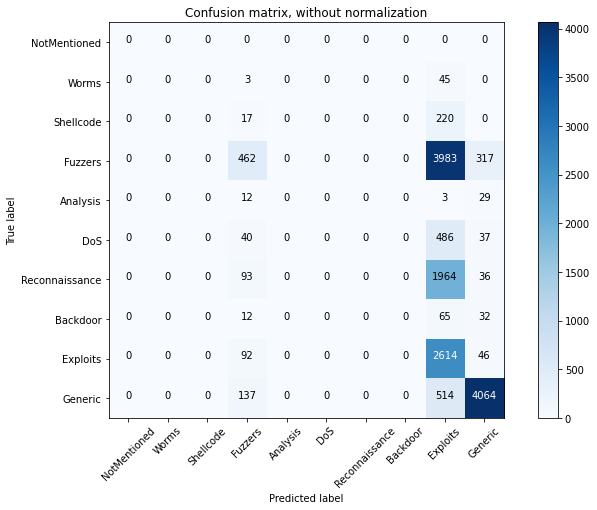

In [ ]:
plt.figure(figsize = (10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


Normalized confusion matrix
[[       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan]
 [0.         0.         0.         0.0625     0.         0.
  0.         0.         0.9375     0.        ]
 [0.         0.         0.         0.07172996 0.         0.
  0.         0.         0.92827004 0.        ]
 [0.         0.         0.         0.09701806 0.         0.
  0.         0.         0.83641327 0.06656867]
 [0.         0.         0.         0.27272727 0.         0.
  0.         0.         0.06818182 0.65909091]
 [0.         0.         0.         0.07104796 0.         0.
  0.         0.         0.86323268 0.06571936]
 [0.         0.         0.         0.04443383 0.         0.
  0.         0.         0.93836598 0.01720019]
 [0.         0.         0.         0.11009174 0.         0.
  0.         0.         0.59633028 0.29357798]
 [0.         0.         0.         0.03343023 0.         0.
  0.         0.         0.94985465 0.01671512]
 

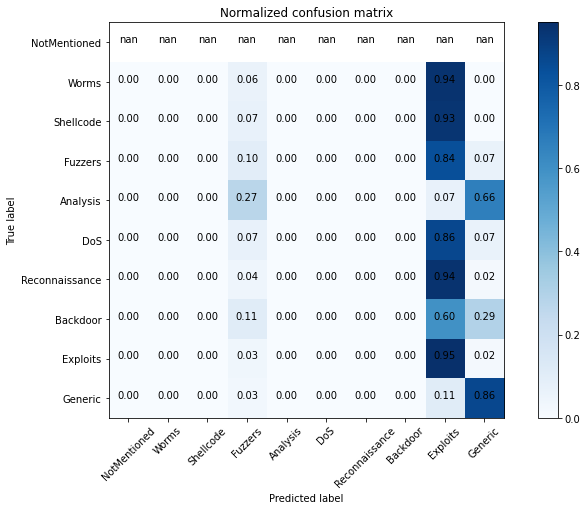

In [ ]:
# Plot normalized confusion matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
precision = precision_score(y_true, y_pred, average='micro')
print('Precision=%.3f' % precision)

#recall = recall_score(y_true, y_pred, labels=[3,4], average='micro')
recall = recall_score(y_true, y_pred,  average='micro')
print('Recall: %.3f' % recall)

score = f1_score(y_true, y_pred, average='micro')
print('F-Measure: %.3f' % score)

Precision=0.950
Recall: 0.950
F-Measure: 0.950


# **Desicion Tree Classification Model**

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

# Train a DecisionTree model
dTree = DecisionTreeClassifier(labelCol='indexedLabel', featuresCol='indexedFeatures')

# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",labels=labelIndexer.labels)

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dTree,labelConverter])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)
# Select example rows to display.
predictions.select("features","attack_cat","predictedLabel").show(5)



+--------------------+------------+--------------+
|            features|  attack_cat|predictedLabel|
+--------------------+------------+--------------+
|(23,[2,3,4,7,8,9,...|Not_Effected|  Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|  Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|  Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|  Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|  Not_Effected|
+--------------------+------------+--------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
DT_accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - DT_accuracy))
print("Decision Tree Classification Model Accuracy =", DT_accuracy)
DTModel = model.stages[-2]
# summary only
print(DTModel)  

Test Error = 0.0256735
Accuracy = 0.9743265311412519
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_19c3253891df, depth=5, numNodes=45, numClasses=10, numFeatures=23


**Confusion Matrix for the Decision Tree Classifier**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
class_temp = predictions.select("attack_cat").groupBy("attack_cat")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["attack_cat"].values.tolist()
class_names= ['NotMentioned','Worms','Shellcode','Fuzzers','Analysis','DoS','Reconnaissance','Backdoor','Exploits','Generic']

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = predictions.select("attack_cat")
y_true = y_true.toPandas()

y_pred = predictions.select("predictedLabel")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)
cnf_matrix

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,   33,    0,   15,    6],
       [   0,    0,    0,    0,    0,    0,    0,    0,  350,    0],
       [   0,    0,    0, 1161,   33,    0,  187,    0,  588,  936],
       [   0,    0,    0,   13,   26,    0,   22,    0,   34,  421],
       [   0,    0,    0,   37,   29,   10,  231,    0,  780,  497],
       [   0,    0,    0,   22,    0,    0, 2841,    0,   20, 1028],
       [   0,    0,    0,   23,   34,    0,   59,    0,   66,  370],
       [   0,    0,    0,  195,   27,    0, 1296,    0, 5236,  664],
       [   0,    0,    0,   59,    0,    0,  146,    0,  802, 6510]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


Normalized confusion matrix
[[       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan]
 [0.         0.         0.         0.         0.         0.
  0.61111111 0.         0.27777778 0.11111111]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.        ]
 [0.         0.         0.         0.39965577 0.01135972 0.
  0.06437177 0.         0.20240964 0.3222031 ]
 [0.         0.         0.         0.0251938  0.0503876  0.
  0.04263566 0.         0.06589147 0.81589147]
 [0.         0.         0.         0.02335859 0.01830808 0.00631313
  0.14583333 0.         0.49242424 0.31376263]
 [0.         0.         0.         0.00562516 0.         0.
  0.72641268 0.         0.00511378 0.26284838]
 [0.         0.         0.         0.04166667 0.0615942  0.
  0.10688406 0.         0.11956522 0.67028986]
 [0.         0.         0.         0.02628741 0.0036398  0.
  0.17471016 0.         0.70585063 0.089

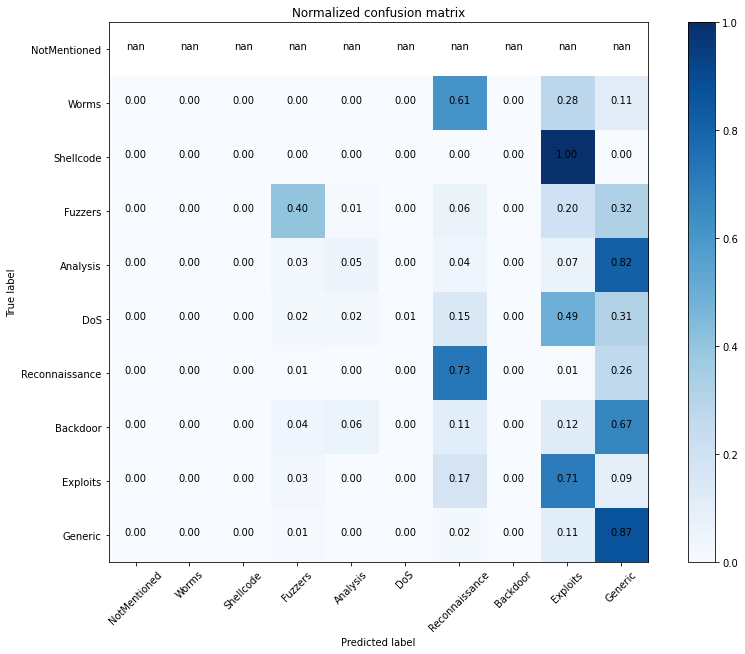

In [ ]:
plt.figure(figsize = (12,9))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()



Confusion matrix, without normalization
[[   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0   33    0   15    6]
 [   0    0    0    0    0    0    0    0  350    0]
 [   0    0    0 1161   33    0  187    0  588  936]
 [   0    0    0   13   26    0   22    0   34  421]
 [   0    0    0   37   29   10  231    0  780  497]
 [   0    0    0   22    0    0 2841    0   20 1028]
 [   0    0    0   23   34    0   59    0   66  370]
 [   0    0    0  195   27    0 1296    0 5236  664]
 [   0    0    0   59    0    0  146    0  802 6510]]


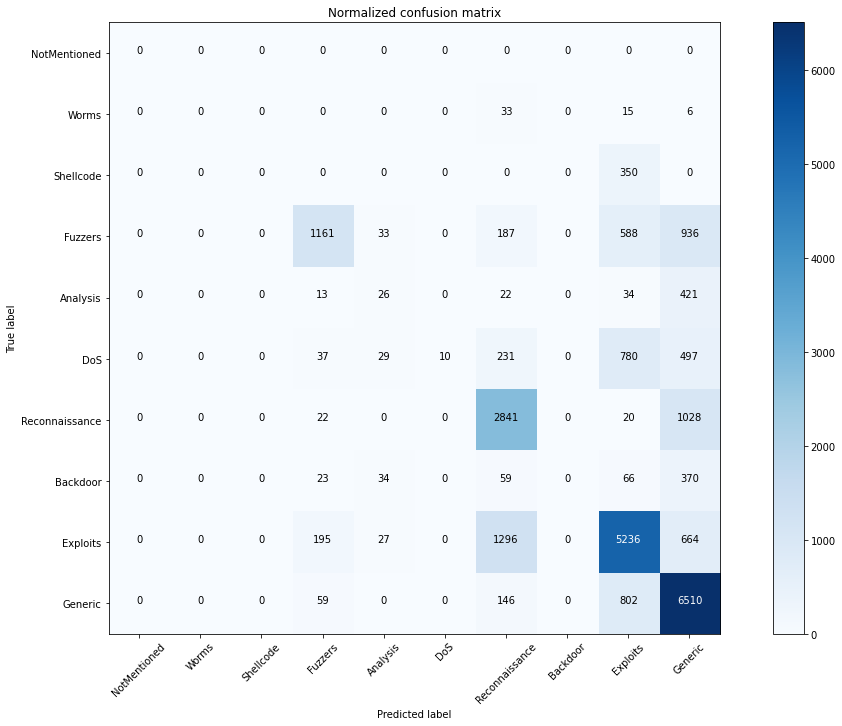

In [ ]:
plt.figure(figsize = (15,10))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=None,title='Normalized confusion matrix')

plt.show()



# **Random Forest Classifier**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol='indexedLabel', featuresCol='indexedFeatures')

# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",labels=labelIndexer.labels)

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dTree,labelConverter])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)
# Select example rows to display.
predictions.select("features","attack_cat","predictedLabel").show(5)


+--------------------+------------+--------------+
|            features|  attack_cat|predictedLabel|
+--------------------+------------+--------------+
|(23,[2,3,4,7,8,9,...|Not_Effected|  Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|  Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|  Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|  Not_Effected|
|(23,[2,3,4,7,8,9,...|Not_Effected|  Not_Effected|
+--------------------+------------+--------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
RF_accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - RF_accuracy))
print("Random Forest Classifier Model Accuracy =", RF_accuracy)
RFModel = model.stages[-2]
# summary only
print(RFModel)  

Test Error = 0.0256735
Random Forest Classifier Model Accuracy = 0.9743265311412519
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_19c3253891df, depth=5, numNodes=45, numClasses=10, numFeatures=23


# **All model Accuracy by using lazy predict** below are the screenshots of those respective

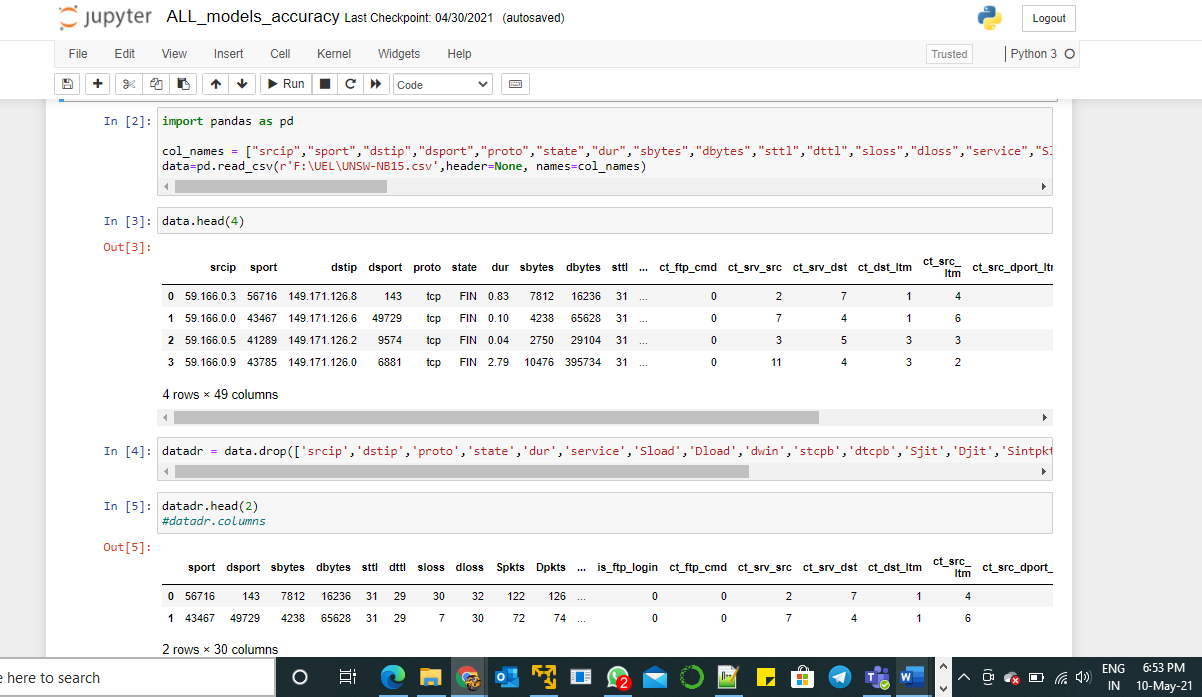

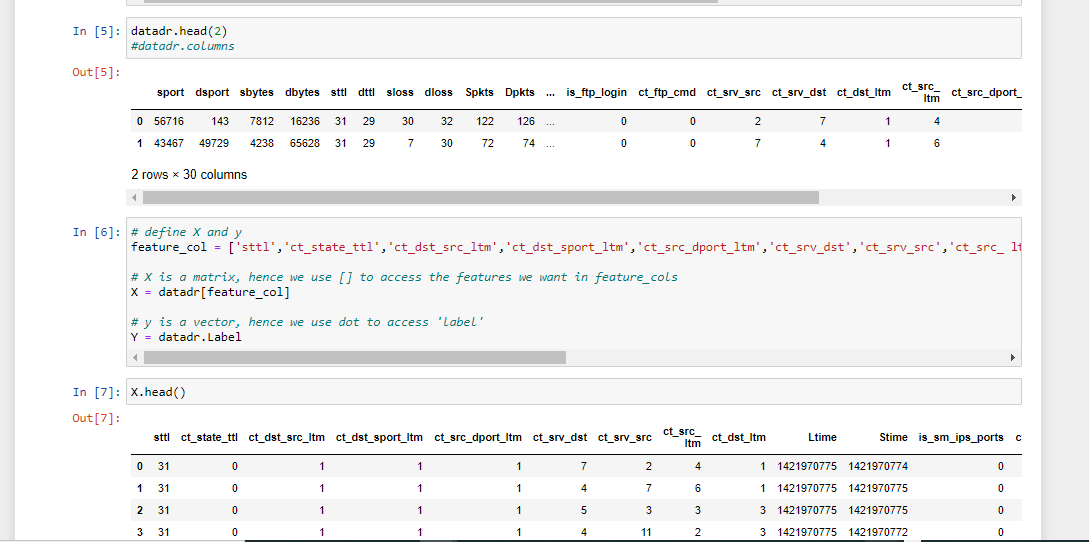

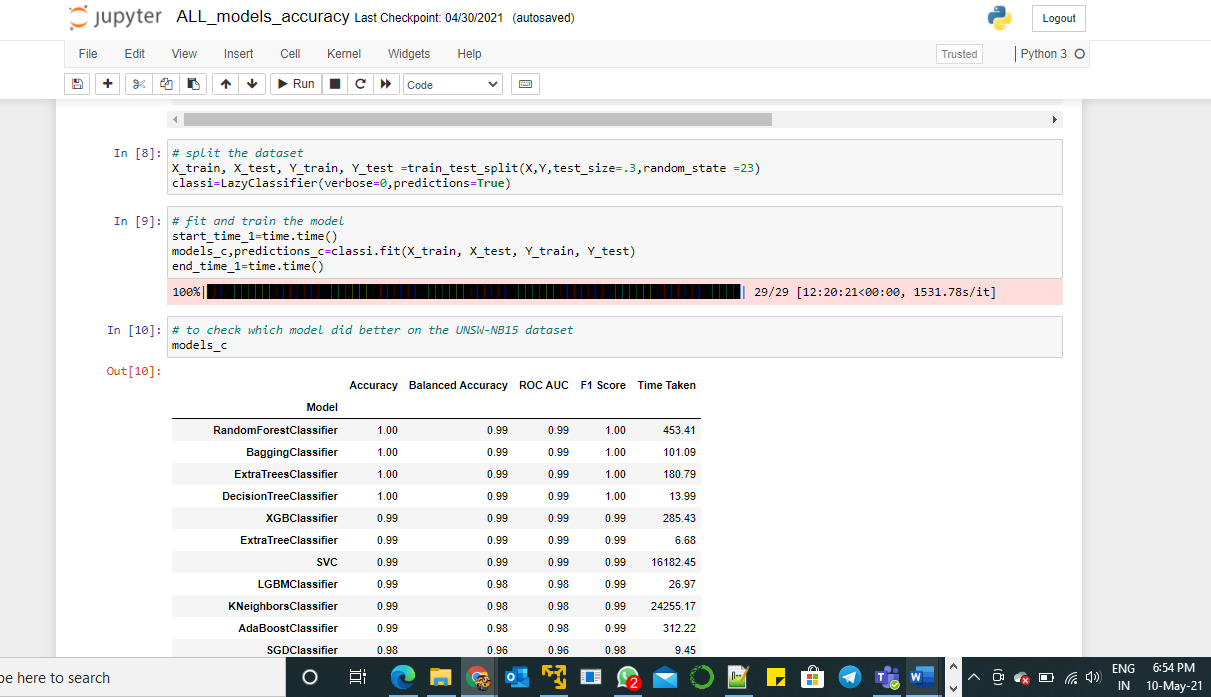

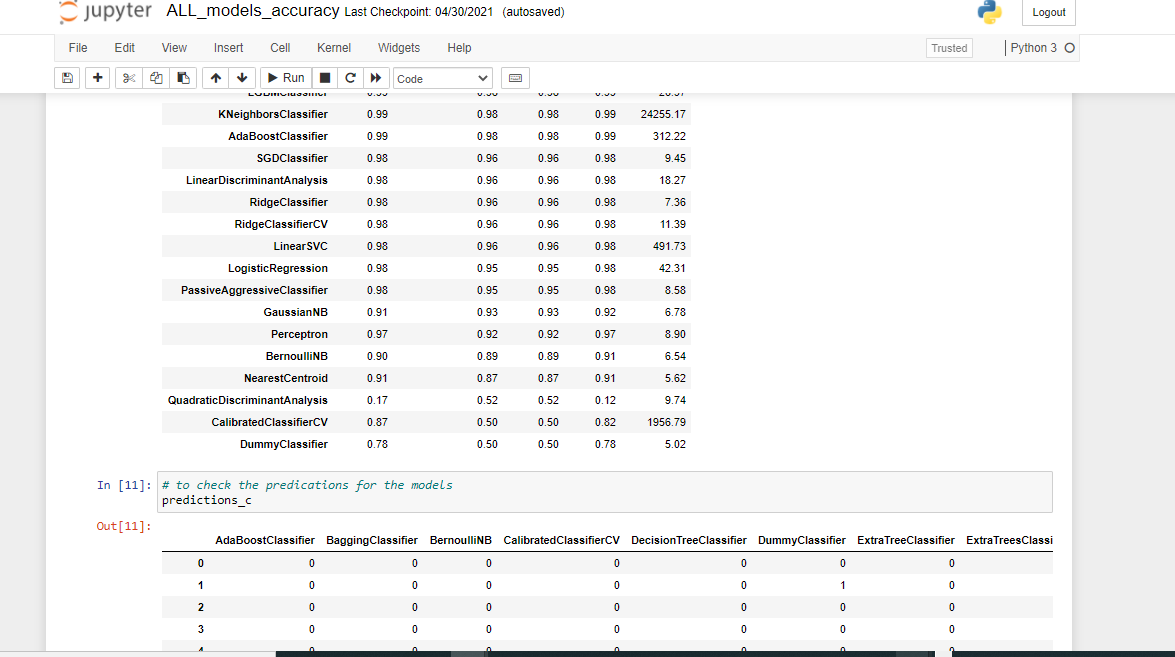

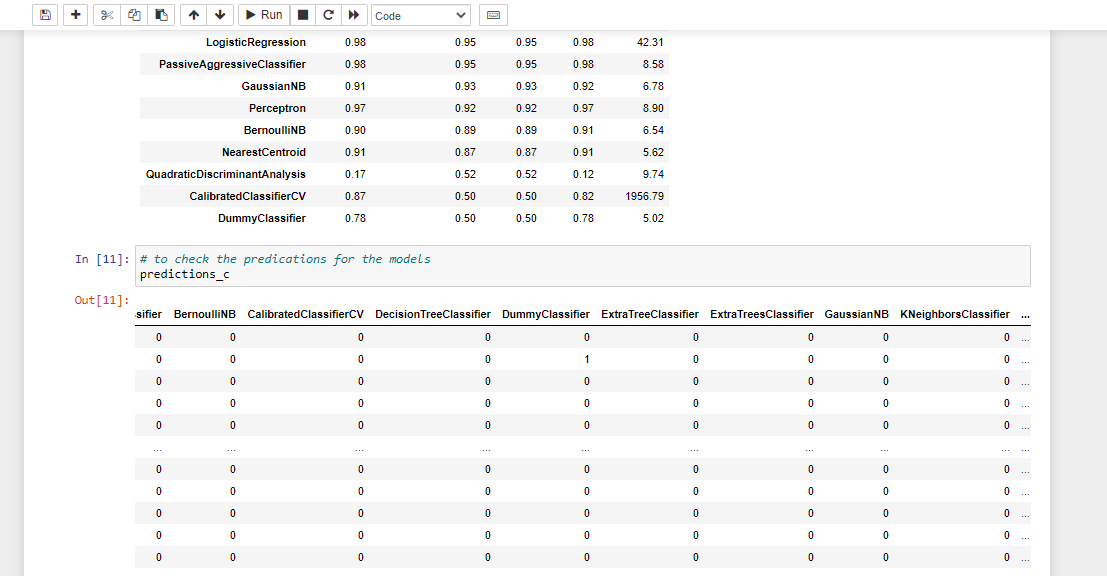